## Setup and Import Libraries

In [1]:
import vertexai
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from vertexai.language_models import TextEmbeddingModel
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from utils import authenticate, plot_2D, plot_heatmap

In [2]:
credentials, PROJECT_ID = authenticate()

In [3]:
REGION = 'us-central1'

In [4]:
vertexai.init(
    project=PROJECT_ID, 
    location=REGION, 
    credentials=credentials
)

In [6]:
embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-005")

## Embeddings Capture Meaning

In [7]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"

in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"

in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

- Get embeddings for all pieces of text.
- Store them in a 2D NumPy array (one row for each embedding).

In [8]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings(
        [input_text])[0].values
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [9]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[-0.05458273 -0.03081056  0.01787397 ... -0.03582569  0.03522366
   0.00074682]
 [ 0.02011585  0.03377165 -0.05426059 ... -0.09215748  0.02665725
   0.00386064]
 [-0.0157417   0.06784437 -0.01985886 ... -0.01154464 -0.01376412
  -0.01166728]
 ...
 [-0.04797111 -0.03407229 -0.03899868 ... -0.06153725 -0.04532854
   0.00285679]
 [ 0.00603454  0.01985977  0.02174417 ... -0.02149764 -0.04304316
   0.03196545]
 [ 0.00377649 -0.00705602  0.03587438 ...  0.02944065 -0.01096778
  -0.01086013]]


**Reduce embeddings from 768 to 2 dimensions for visualization**

In [10]:
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [11]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.45214053 -0.15826169]
 [-0.45395603 -0.16248863]
 [-0.35921767 -0.10493918]
 [ 0.04143236  0.48789846]
 [ 0.19796318  0.54824446]
 [ 0.45585968 -0.31727199]
 [ 0.57005901 -0.29318144]]


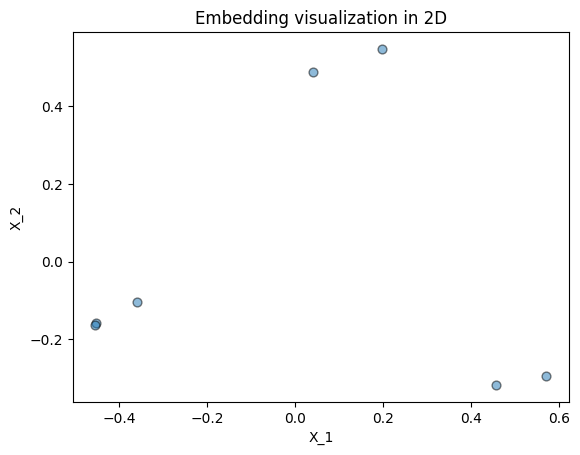

In [12]:
plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

## Embeddings and Similarity

Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [13]:
in_1 = "He couldn’t desert his post at the power plant."

in_2 = "The power plant needed him at the time."

in_3 = "Cacti are able to withstand dry environments."

in_4 = "Desert plants can survive droughts." 

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [14]:
embeddings = []
for input_text in input_text_lst_sim:
    emb = embedding_model.get_embeddings([input_text])[0].values
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings)

In [15]:
y_labels = input_text_lst_sim

<Figure size 5000x800 with 0 Axes>

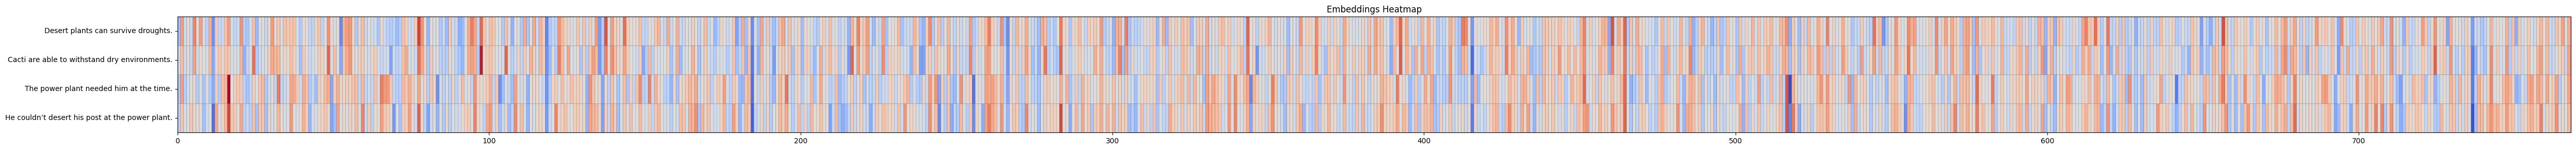

In [18]:
plt.figure(figsize=(50,8))
plot_heatmap(data=embeddings_array, y_labels=y_labels, title="Embeddings Heatmap")

## Compute Cosine Similarity

In [19]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [20]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

He couldn’t desert his post at the power plant.
The power plant needed him at the time.
[[0.80055782]]


In [21]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

He couldn’t desert his post at the power plant.
Desert plants can survive droughts.
[[0.42909545]]
